# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units="metric"
    query_url=f"{url}appid={weather_api_key}&units={units}&q="
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =  city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | cabedelo
Processing Record 3 of Set 1 | tuam
Processing Record 4 of Set 1 | dongcun
Processing Record 5 of Set 1 | oum el bouaghi
Processing Record 6 of Set 1 | rongelap
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | riberalta
Processing Record 11 of Set 1 | banfora
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | rikaze
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | hotan
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | colonia
Processing Record 19 of Set 1 | bubaque
Processing Record 20 of Set 1 | vernon
Processing Record 21 of Set 1 | nikol'sk
Processing Record 22 of Set 1 | inebolu
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,21.14,65,72,0.45,US,1724279205
1,cabedelo,-6.9811,-34.8339,25.37,86,8,6.14,BR,1724279206
2,tuam,53.5167,-8.8500,14.82,84,100,9.53,IE,1724279207
3,dongcun,36.7767,121.1597,24.24,92,100,2.87,CN,1724279208
4,oum el bouaghi,35.8754,7.1135,20.43,49,82,1.41,DZ,1724279209


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,21.14,65,72,0.45,US,1724279205
1,cabedelo,-6.9811,-34.8339,25.37,86,8,6.14,BR,1724279206
2,tuam,53.5167,-8.8500,14.82,84,100,9.53,IE,1724279207
3,dongcun,36.7767,121.1597,24.24,92,100,2.87,CN,1724279208
4,oum el bouaghi,35.8754,7.1135,20.43,49,82,1.41,DZ,1724279209


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

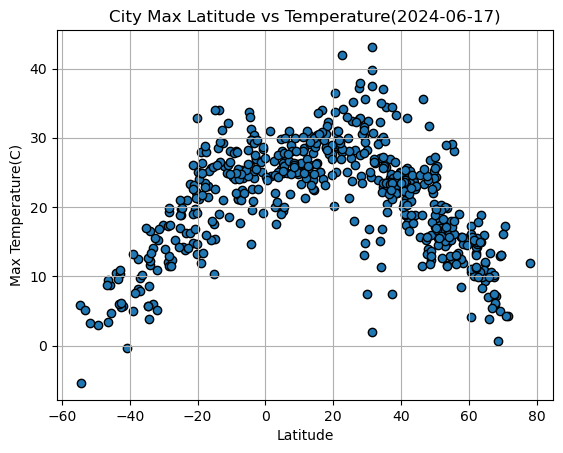

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title(f"City Max Latitude vs Temperature(2024-06-17)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

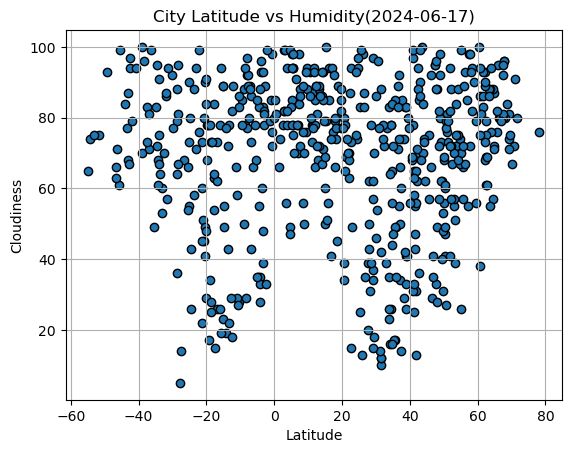

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs Humidity(2024-06-17)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

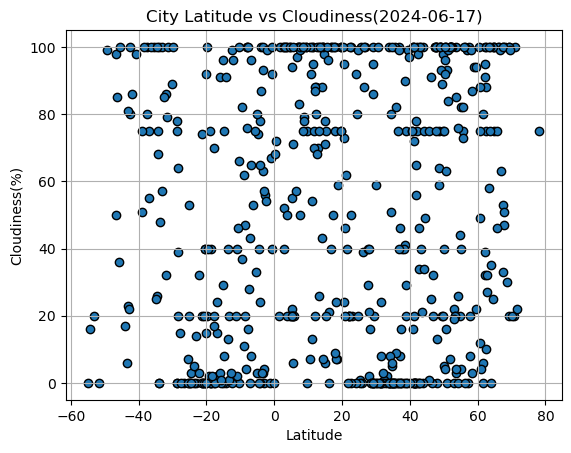

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Latitude vs Cloudiness(2024-06-17)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

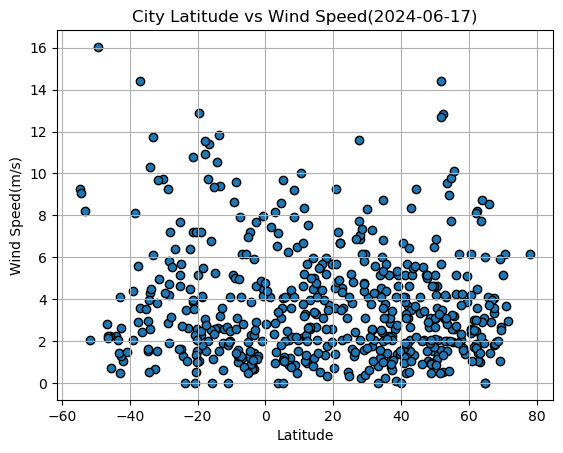

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title(f"City Latitude vs Wind Speed(2024-06-17)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:

# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, title, x_label, y_label):
    
# Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
# Annotate the line equation
   
    plt.annotate(line_eq,(0.05, 0.95),xycoords='axes fraction', verticalalignment='top', fontsize=15,color="red")
    

 #Label the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
   

# Print r^2 value
    print(f"The r^2-value is: {rvalue**2}")

# Show plot
    plt.show()
    
    

    return



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,21.14,65,72,0.45,US,1724279205
2,tuam,53.5167,-8.8500,14.82,84,100,9.53,IE,1724279207
3,dongcun,36.7767,121.1597,24.24,92,100,2.87,CN,1724279208
4,oum el bouaghi,35.8754,7.1135,20.43,49,82,1.41,DZ,1724279209
5,rongelap,11.1635,166.8941,28.05,78,13,4.61,MH,1724279211


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cabedelo,-6.9811,-34.8339,25.37,86,8,6.14,BR,1724279206
6,ushuaia,-54.8000,-68.3000,5.81,65,0,9.26,AR,1724278988
7,atafu village,-8.5421,-172.5159,28.16,78,47,9.60,TK,1724279213
8,waitangi,-43.9535,-176.5597,10.46,84,17,2.24,NZ,1724279214
9,riberalta,-10.9833,-66.1000,32.11,58,40,0.00,BO,1724279215


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4593925881242716


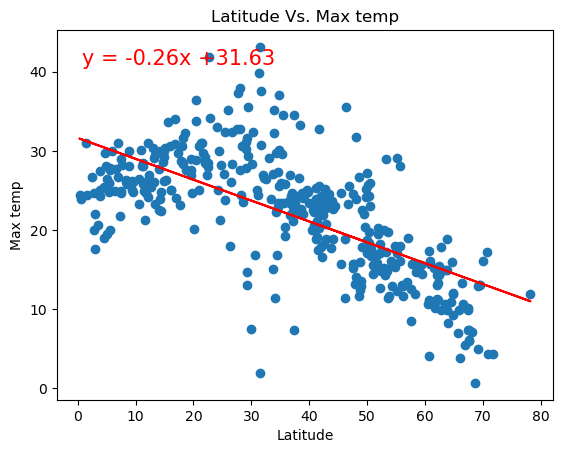

In [15]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],"Latitude Vs. Max temp","Latitude","Max temp" )

The r^2-value is: 0.6954201517521481


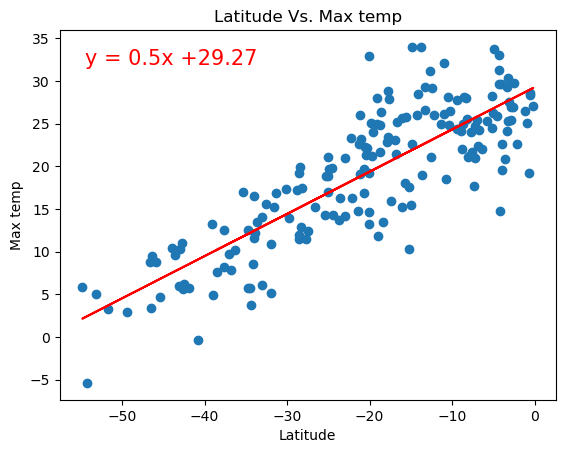

In [16]:
# Linear regression on Southern Hemisphere
plt.clf()
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Latitude Vs. Max temp","Latitude","Max temp" )

**Discussion about the linear relationship:** Please note that the regression equation below is the one that was returned in my final run. It is likely to change slightly as is the case with regression models in every fresh run.  
The equation y=−0.26x+31.63 (y=slope*x + intercept) describes a linear relationship where y decreases as x increases. In this case, as the Latitude value increases as you go up north in the northern hemisphere, away from the equator (latitude 0), the max temp starts to decrease.The equation y=0.5x+29.27 (y=slope*x + intercept)on the other hand, describes a linear relationship where y increases as x increases. In this case, as the Latitude value increases, going from -values to +values,the Max temp of the area increases as you go up north in the southern hemisphere, towards the equator where the latitude is 0.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0013862008064133176


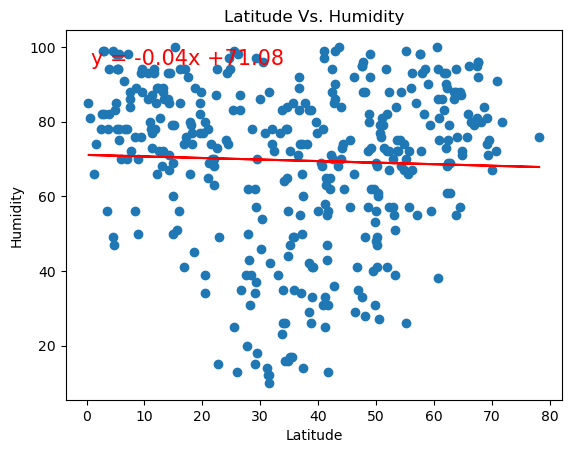

In [17]:
# Northern Hemisphere
plt.clf()
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],"Latitude Vs. Humidity","Latitude","Humidity" )

The r^2-value is: 0.01652627041638444


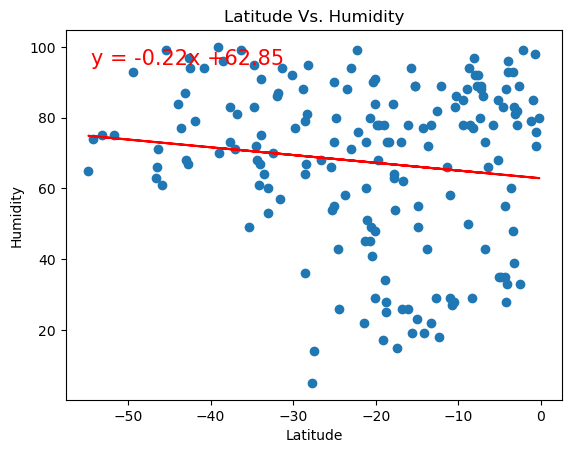

In [18]:
# Southern Hemisphere
plt.clf()
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Latitude Vs. Humidity","Latitude","Humidity" )

**Discussion about the linear relationship:** Please note that the regression equation below is the one that was returned in my final run. It is likely to change slightly as is the case with regression models in every fresh run.  
The equation y=−0.04x+71.08 (y=slope*x + intercept) describes a linear relationship where y decreases slightly as x increases. In this case, as the Latitude value increases, humidity gradually declines as you move up north from the equator(latitude 0) in the northern hemisphere.The equation y=−0.22x+62.85 (y=slope*x + intercept) describes a linear relationship where y decreases as x increases. In this case, an increase in the latitude value from negative to positive in the southern hemisphere i.e a move up towards the equator(latitude 0) leads to a gradual decline in the humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0004349087976873811


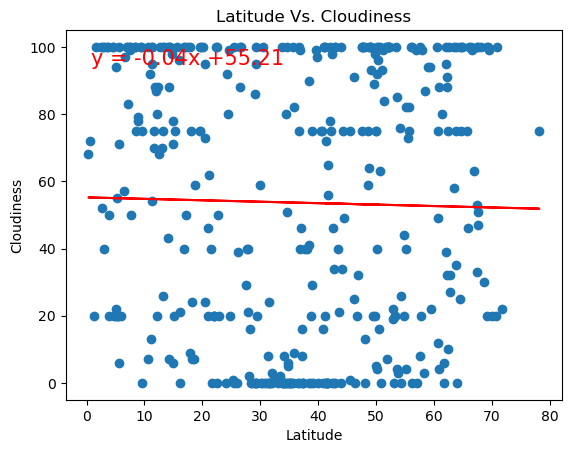

In [19]:
# Northern Hemisphere
plt.clf()
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],"Latitude Vs. Cloudiness","Latitude","Cloudiness" )

The r^2-value is: 0.008128754400703068


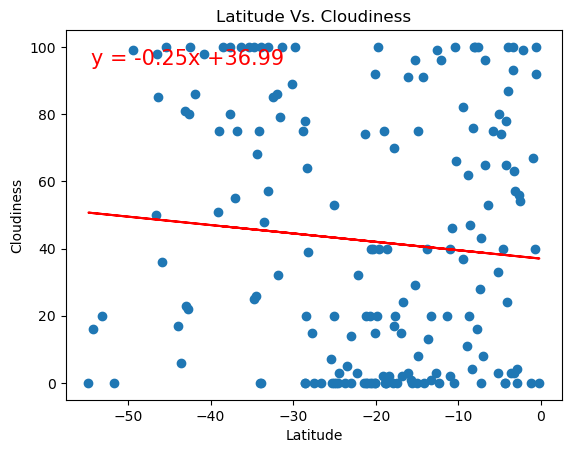

In [20]:
# Southern Hemisphere
plt.clf()
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Latitude Vs. Cloudiness","Latitude","Cloudiness" )

**Discussion about the linear relationship:** Please note that the regression equation below is the one that was returned in my final run. It is likely to change slightly as is the case with regression models in every fresh run.  
The equation y=−0.4x+55.21 describes a linear relationship where y decreases as x increases. In this case, an increase in the Latitude value leads to a gradual decline in the cloudiness as you move away from the equator(latitude 0) in the northern hemisphere.The equation y=−0.25x+36.99 describes a linear relationship where y decreases as x increases. In this case, as the Latitude value increases from negative to positive moving up north in the southern hemisphere towards the equator(latitude 0) it leads to a decrease in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0008182446871221453


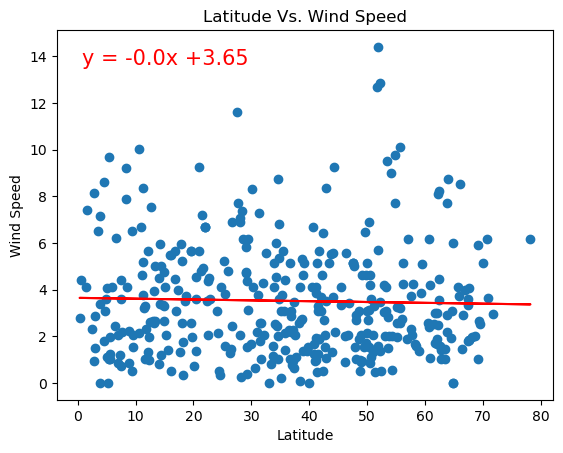

In [21]:
# Northern Hemisphere
plt.clf()
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],"Latitude Vs. Wind Speed","Latitude","Wind Speed" )

The r^2-value is: 0.017726219195113652


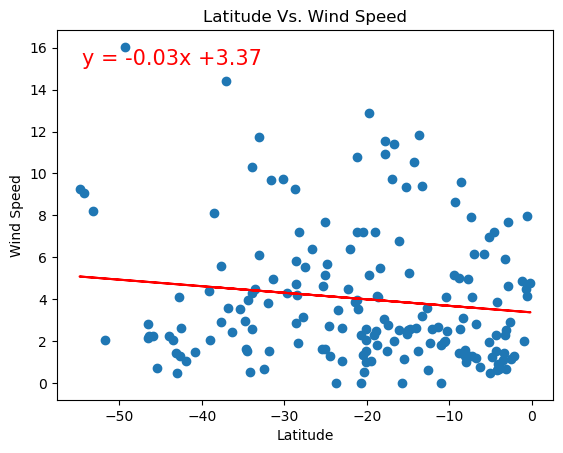

In [22]:
# Southern Hemisphere
plt.clf()
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Latitude Vs. Wind Speed","Latitude","Wind Speed" )

**Discussion about the linear relationship:** Please note that the regression equation below is the one that was returned in my final run. It is likely to change slightly as is the case with regression models in every fresh run.  
The equation y=−0.0x+3.65 describes a situation where the dependent variable y remains constant regardless of the value of the independent variable x. This means that there is no relationship between x and y; y does not change as x changes. In this case, as the latitude increases as you move away from the equator(latitude 0) in the northern hemisphere, there is no impact on the wind speed as a result of it.The equation y=−0.03x+3.37 describes a linear relationship where y decreases slightly as x increases. In this case, as the Latitude values increase from negative to positive as we move towards the equator(latitude 0) in the southern hemisphere, it leads to a very gradual decline in the wind speed, but the overall effect is miniscule.
